# Project: Investigating Netflix Movies

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

## 1. Loading the data from a CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

netflix=pd.read_csv('/Users/a123456/Documents/projects/datacamp/InvestigatingNetflixMovies/netflix_data.csv',sep=",")
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123   

                                         description             genre  
0  In a future where the elite inhabit an island ...  International TV  
1  After a devastating earthquake hits Mexico Cit...            Dramas  
2  When an army recruit is found dead, his fellow...     Horror Movies  
3  In a postapocalyptic world, rag-doll robots hi...            Action  
4  A brilliant group of students become card-coun...            Dramas

## 2. Filtering data

Filter the data to remove TV shows and keeping only the columns "title", "country", "genre", "release_year", "duration". Filter netflix_movies to find the movies that are shorter than 60 minutes.

In [2]:
netflix_subset=netflix[netflix['type']=='Movie']
netflix_movies=netflix_subset[["title", "country", "genre", "release_year", "duration"]]
netflix_movies.head()

title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95

In [6]:
short_movies=netflix_movies[netflix_movies['duration']<60]
short_movies.head()

title        country  \
35                                           #Rucker50  United States   
55                 100 Things to do Before High School  United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...            NaN   
101                                  3 Seconds Divorce         Canada   
146                                     A 3 Minute Hug         Mexico   

             genre  release_year  duration  
35   Documentaries          2016        56  
55   Uncategorized          2014        44  
67   Uncategorized          2017        37  
101  Documentaries          2018        53  
146  Documentaries          2019        28

In [7]:
print(short_movies['genre'].value_counts())

genre
Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: count, dtype: int64


## 3. Marking non-feature films

Interesting! It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.
Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else).

In [11]:
colors=[]
for label, row in netflix_movies.iterrows():
    if row['genre'] == "Children":
        colors.append('red')
    elif row['genre'] == "Documentaries":
        colors.append('blue')
    elif row['genre'] == "Stand-Up":
        colors.append('green')
    else:
        colors.append('black')

colors[:5]

['black', 'black', 'black', 'black', 'black']

## 4. Creating chart

We now have a colors list that we can pass to our scatter plot, which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.

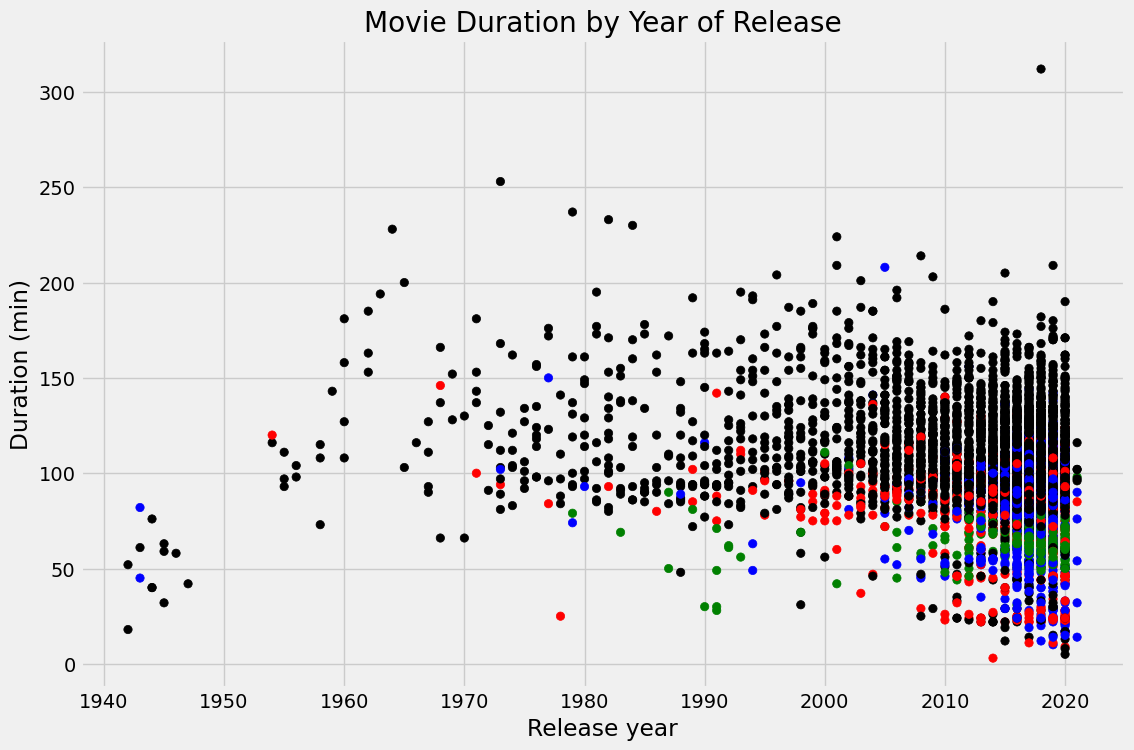

In [12]:
plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(12,8))
plt.scatter(netflix_movies.loc[:,'release_year'],
            netflix_movies.loc[:,'duration'],color=colors)
plt.title('Movie Duration by Year of Release')
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.show()

## 5. What next?

Well, as we suspected, non-typical genres such as children's movies and documentaries are all clustered around the bottom half of the plot. But we can't know for certain until we perform additional analyses.

In [13]:
# Are we certain that movies are getting shorter?
answer="maybe"